# National Survey on Drug Use and Health

http://datafiles.samhsa.gov/study-dataset/nsduh-2002-2017-ds0001-nsduh-2002-2017-ds0001-nid18471

In [1]:
from jupyterthemes import jtplot

jtplot.style()

In [99]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Extraction:

WORKDAYS - days missed work for injury/illness past 30 days

HEALTH - Overall health: excellent = 1, very good = 2, good = 3, fair = 4, or poor = 5

HLTINMNT - mental or emotional difficulties: 1 = yes, 2 = no

MRDAYPMO - days per month used marijuana/hashish past 12 months

MTDAYPMO - days per month used methamphetamine past 12 months

OXDAYPMO - days per month used oxycontin past 12 months

PRDAYPMO - days per month used pain reliever past 12 months

STDAYPMO - days per month used stimulant past 12 months

TRDAYPMO - days per month used tranquilizers past 12 months

ALDAYPMO - days per month drank alcohol past 12 months

CCDAYPMO - days per month used cocaine past 12 months

CRDAYPMO - days per month used crack past 12 months

HLDAYPMO - days per month used hallucinogen past 12 months

HRDAYPMO - days per month used heroin past 12 months

INDAYPMO - days per month used inhalant past 12 months

SVDAYPMO - days per month used sedative past 12 months

To consider:

ANXDYR - had anxiety in past year: 0 = no, 1 = yes

DEPRSYR - haddepression in oast year: 0 = no, 1 = yes

In [3]:
features = ['YEAR', 'ALDAYPMO', 'MRDAYPMO', 'CCDAYPMO',
            'CRDAYPMO', 'HRDAYPMO', 'HLDAYPMO', 'INDAYPMO',
            'PRDAYPMO', 'OXDAYPMO', 'TRDAYPMO', 'STDAYPMO',
            'MTDAYPMO', 'SVDAYPMO', 'WORKDAYS', 'HEALTH',
            'HLTINMNT']

In [7]:
import csv

def reduce_file_size(in_file, out_file, columns):
    with open(in_file) as f_in, open(out_file, 'w+') as f_out:
        reader = csv.reader(f_in, delimiter='\t')
        writer = csv.writer(f_out)
        header = reader.__next__()
        column_indices = [header.index(column) for column in columns]
        
        writer.writerow(columns)
        
        for row in reader:
            line = [row[index] for index in column_indices]
            writer.writerow(line)

In [86]:
# NOTE: takes a long time

base_dir = './datasets/nsduh/'
in_file = base_dir + 'NSDUH_2002_2017_Tab.tsv'
out_file = base_dir + 'NSDUH_2002_2017_reduced.csv'
# reduce_file_size(in_file, out_file, features)

In [63]:
df = pd.read_csv('./datasets/nsduh/NSDUH_2002_2017_reduced.csv')
df.head()

,YEAR,ALDAYPMO,MRDAYPMO,CCDAYPMO,CRDAYPMO,HRDAYPMO,HLDAYPMO,INDAYPMO,PRDAYPMO,OXDAYPMO,TRDAYPMO,STDAYPMO,MTDAYPMO,SVDAYPMO,WORKDAYS,HEALTH,HLTINMNT
0,2002,10,93,93,91,91,93,91,93,-9,91,93,93,91,0,2,1
1,2002,2,93,91,91,91,91,91,91,-9,91,91,91,91,0,2,94
2,2002,4,15,91,91,91,91,91,99,-9,91,91,91,91,99,1,98
3,2002,5,93,91,91,91,93,93,91,-9,91,91,91,91,99,1,1
4,2002,99,91,91,91,91,91,91,91,-9,91,91,91,91,99,3,1


In [64]:
df.shape

(892972, 17)

In [65]:
df.describe()

,YEAR,ALDAYPMO,MRDAYPMO,CCDAYPMO,CRDAYPMO,HRDAYPMO,HLDAYPMO,INDAYPMO,PRDAYPMO,OXDAYPMO,TRDAYPMO,STDAYPMO,MTDAYPMO,SVDAYPMO,WORKDAYS,HEALTH,HLTINMNT
count,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000,892972.000000
mean,2009.544690,75.990027,88.800285,90.851252,90.983961,90.990603,71.945774,71.925475,71.151421,59.324155,71.655388,71.778320,71.891197,71.915431,36.464856,2.160910,53.342246
std,4.603969,37.105155,17.870430,6.764294,2.922288,2.229186,39.723966,39.581040,40.327629,46.305426,39.732707,39.601716,39.400949,39.363381,49.374866,1.605658,48.032699
min,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,1.000000
25%,2006.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,-9.000000,91.000000,91.000000,91.000000,91.000000,0.000000,1.000000,1.000000
50%,2010.000000,93.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,0.000000,2.000000,94.000000
75%,2014.000000,99.000000,93.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,99.000000,3.000000,99.000000
max,2017.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,97.000000,99.000000


In [83]:
coding = {
    81: ('?', np.NaN),
    83: ('?', np.NaN),
    85: ('Bad data', np.NaN),
    89: ('Legitimate skip', np.NaN),
    90: ('?', np.NaN),
    91: ('Never used', 0),
    93: ('Did not use in past 12 months', 0),
    94: ("Don't know", np.NaN),
    97: ('Refused', np.NaN),
    98: ('Blank', np.NaN),
    99: ('Legitimate skip', np.NaN)
}

In [85]:
for column in features[1:]:
    for code, value in coding.items():
        df[column][df[column] == code] = value[1]
    df[column][df[column] < 0] = np.NaN
df.describe()

df['HLTINMNT'][df['HLTINMNT'] == 2] = 0

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


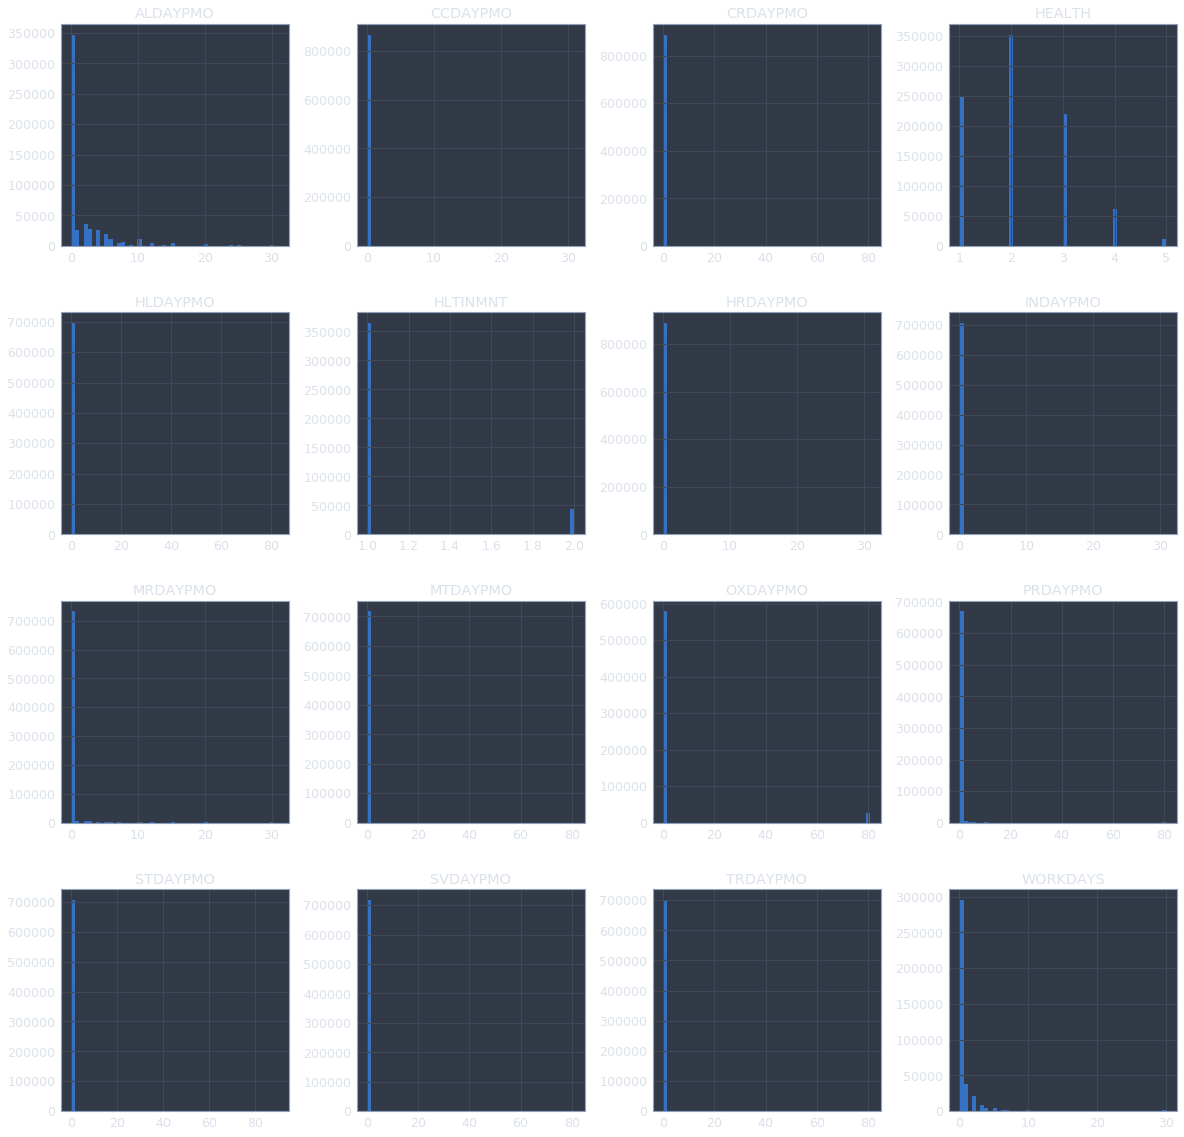

In [76]:
df[features[1:]].hist(figsize=(20, 20), bins=50)
plt.show()

In [90]:
df.groupby('YEAR').count()

,ALDAYPMO,MRDAYPMO,CCDAYPMO,CRDAYPMO,HRDAYPMO,HLDAYPMO,INDAYPMO,PRDAYPMO,OXDAYPMO,TRDAYPMO,STDAYPMO,MTDAYPMO,SVDAYPMO,WORKDAYS,HEALTH,HLTINMNT
YEAR,,,,,,,,,,,,,,,,
2002,32338,46626,52475,53738,53936,51757,52844,50647,0,52792,52916,53572,53755,30066,54071,27813
2003,32997,47701,53603,54874,55079,53286,53979,51635,0,53865,54116,54750,54881,29951,55219,26880
2004,33337,48266,54001,55288,55445,53701,54252,51913,52291,54216,54423,55118,55219,29974,55590,26702
2005,33433,48693,54350,55577,55748,54076,54533,52248,52641,54468,54817,55456,55539,30385,55891,26279
2006,32964,48151,53497,54722,54866,53269,53878,51412,51922,53692,53960,54614,54643,29825,55020,25533
2007,32959,48121,53557,54726,54910,53261,53890,51445,51997,53719,54067,54701,54688,30137,55040,25072
2008,33286,48060,53721,54857,54940,53250,54005,51477,51973,53709,54220,54860,54788,29543,55100,24915
2009,33249,47594,53972,55013,55041,53238,54148,51600,52014,53756,54267,54941,54873,27917,55226,24274
2010,34787,49337,56183,57116,57141,55259,56199,53873,54077,55891,56366,57057,56959,28511,57305,25062


In [91]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
imp.fit(df)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [92]:
df_imp = imp.transform(df)

In [94]:
df_imp = pd.DataFrame(df_imp, columns=df.columns)

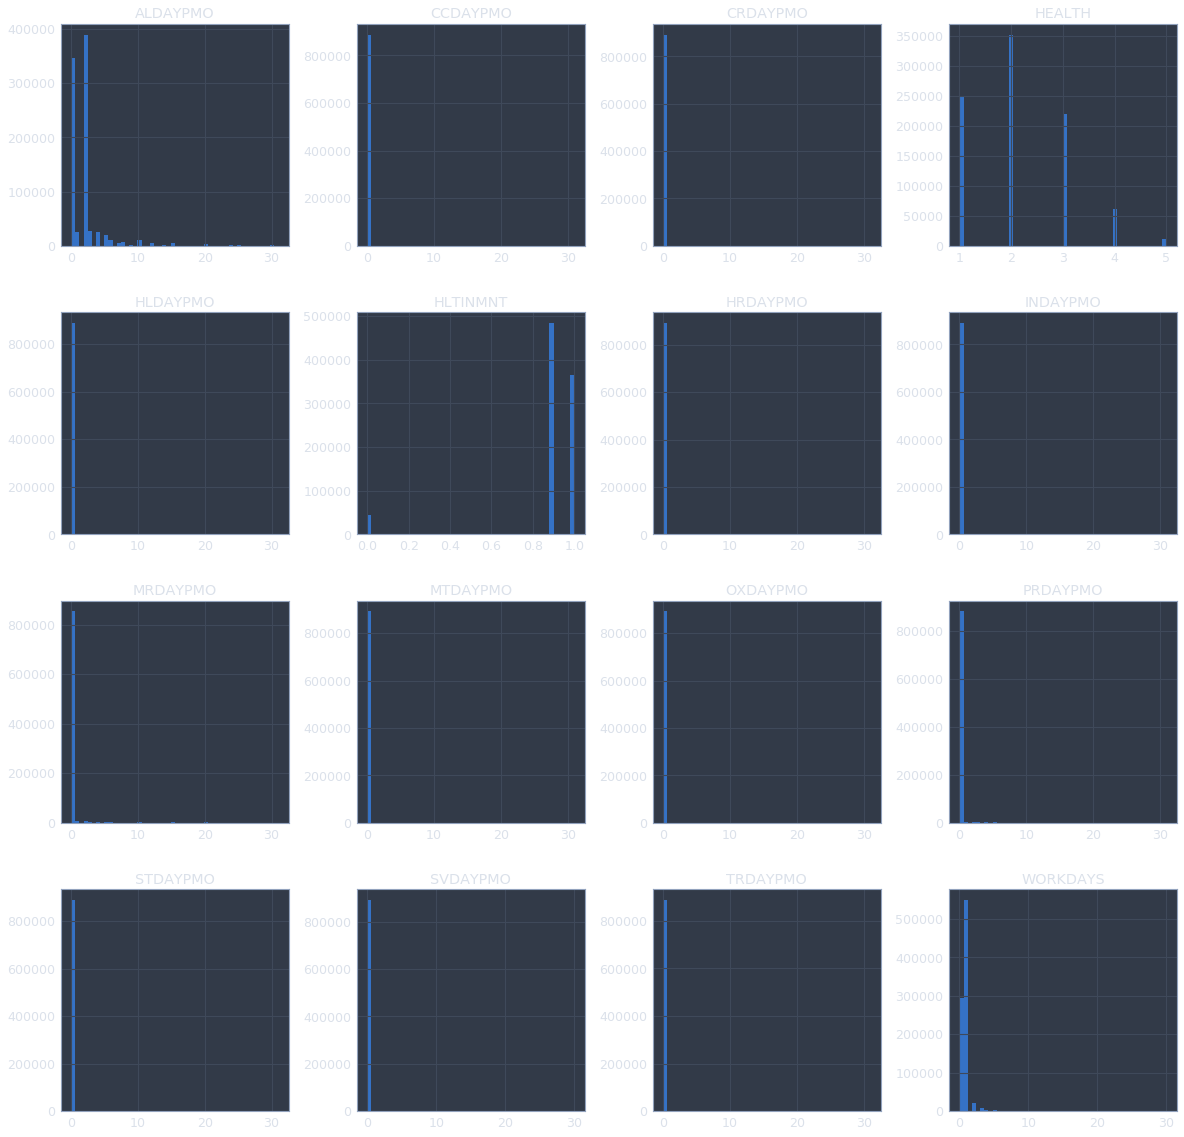

In [98]:
df_imp[features[1:]].hist(figsize=(20, 20), bins=50)
plt.show()

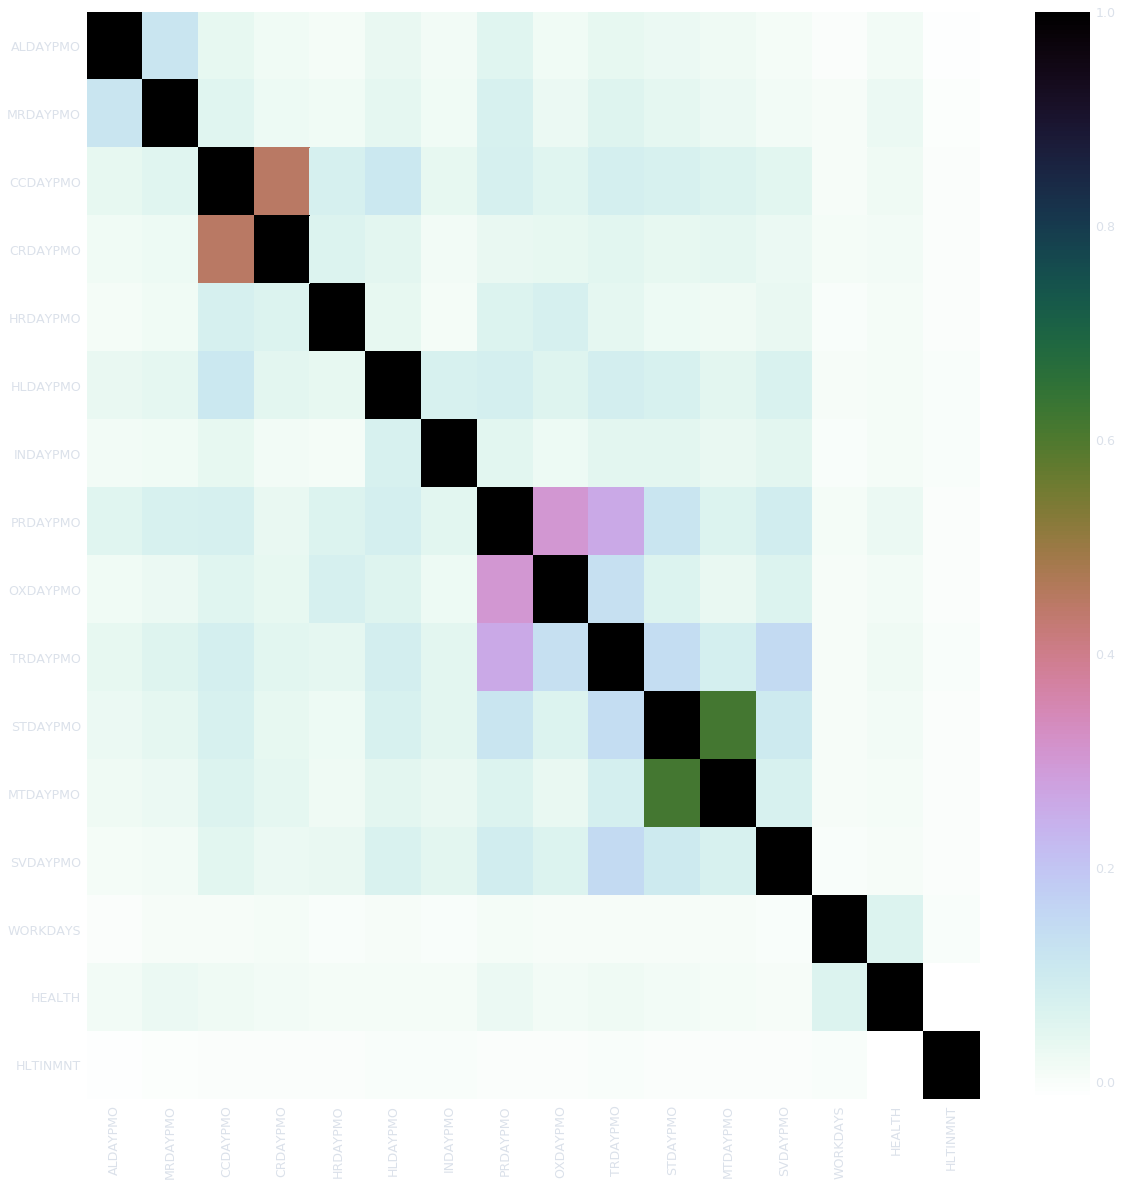

In [100]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_imp[features[1:]].corr(), cmap='cubehelix_r')
plt.show()